## Vehicle routing problem (VRP)

Vehicle routing problems (VRPs) are combinatorial optimization problems that arise in the area of logistics [1].

In most variants, a set of customers needs to be visited and served (delivering or picking some goods) by a given fleet of vehicles. 

We want to find
* a visiting sequence of customers for each vehicle
* with minimal total routing costs, such that
* each customer is visited exactly once,
* the vehicle capacity is never exceeded,
* and potentially other constraints are satisfied, e.g., time windows at the customers.

In VRPs, the goal is to find optimal routes for multiple vehicles visiting a set of locations.

An optimal routes for a VRP is the routes with the least total distance.

A better way to define optimal routes is to minimize the length of the longest single route among all vehicles. 
This is the right definition if the goal is to complete all deliveries as soon as possible. 

Other ways of generalizing the TSP by adding constraints on the vehicles:

* Capacity constraints: the vehicles need to pick up items at each location they visit, but have a maximum carrying capacity.

* Time windows: each location must be visited within a specific time window.

[1] Toth, P., & Vigo, D. (Eds.). (2014). Vehicle routing: problems, methods, and applications. Society for industrial and applied mathematics.


### Capacitated vehicle routing problem (CVRP)

#### Data

* $n$, the number of clientes
* $C$, set of clients, with $C=\{1,2,...,n\}$
* $V$, set of vetices (or nodes), with $V=\{0\}\cup C$
* $A$, set of arcs, with $A=\{(i,j)\in V \times V : i\neq j\}$
* $c_{ij}$, cost of travel over arc $(i,j)\in A$
* $Q$, the vehicle capacity
* $q_i$, the amount that has to be delivered to customer $i\in N$


#### Variables

* $
x_{ij} =
\left\{
\begin{array}{rl}
1, & \text{ if arc } (i,j) \text{ is active} \\
0, & \text{ otherwise}
\end{array}
\right.
$

* $u_i$, capacity of $i \in C$

#### MIP formulation

$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in C \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in C \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in C \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [1]:
# library
import gurobipy as gp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# vertices
n = 20
C = [i for i in range(n) if i!=0] # clients set
V = [0] + C # vertices set
A = [(i,j) for i in V for j in V if i!=j]

In [3]:
print("n = ", n)
print("C = ", C)
print("V = ", V)
print("A = ", A)

n =  20
C =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
V =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
A =  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5,

In [4]:
# demand
np.random.seed(0)
q = {n: np.random.randint(10,15) for n in C}
q[0] = 0
Q = 50

In [5]:
print("q = ", q)
print("Q = ", Q)

q =  {1: 14, 2: 10, 3: 13, 4: 13, 5: 13, 6: 11, 7: 13, 8: 12, 9: 14, 10: 10, 11: 10, 12: 14, 13: 12, 14: 11, 15: 10, 16: 11, 17: 11, 18: 10, 19: 11, 0: 0}
Q =  50


In [6]:
# coord
X = np.random.rand(len(V)) * 100
Y = np.random.rand(len(V)) * 100

In [7]:
# distance
distance = {
    (i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in V if i!=j
}

In [8]:
print(distance)

{(0, 1): 28.92032294336181, (0, 2): 38.929628324309704, (0, 3): 90.81719116540172, (0, 4): 37.337861214715154, (0, 5): 49.517826649657074, (0, 6): 76.80149010171904, (0, 7): 13.727878642360595, (0, 8): 82.07088809055409, (0, 9): 50.865286889352404, (0, 10): 6.947669344232919, (0, 11): 23.609134615331172, (0, 12): 61.107476951076485, (0, 13): 70.989947980336, (0, 14): 24.74482923589009, (0, 15): 47.50496693514365, (0, 16): 49.265838302360514, (0, 17): 91.71816566558171, (0, 18): 71.85030638791666, (0, 19): 58.36040050239462, (1, 0): 28.92032294336181, (1, 2): 61.13675239381908, (1, 3): 71.7433699869066, (1, 4): 55.105708006363436, (1, 5): 40.46992283757422, (1, 6): 80.60022536985176, (1, 7): 19.574186661334966, (1, 8): 80.9465127106333, (1, 9): 55.65826128472029, (1, 10): 21.98734059136168, (1, 11): 21.692286388699245, (1, 12): 65.69332066601223, (1, 13): 46.63008659061649, (1, 14): 14.714989585442154, (1, 15): 25.866712302660588, (1, 16): 55.28358390697754, (1, 17): 75.20843369434603, 

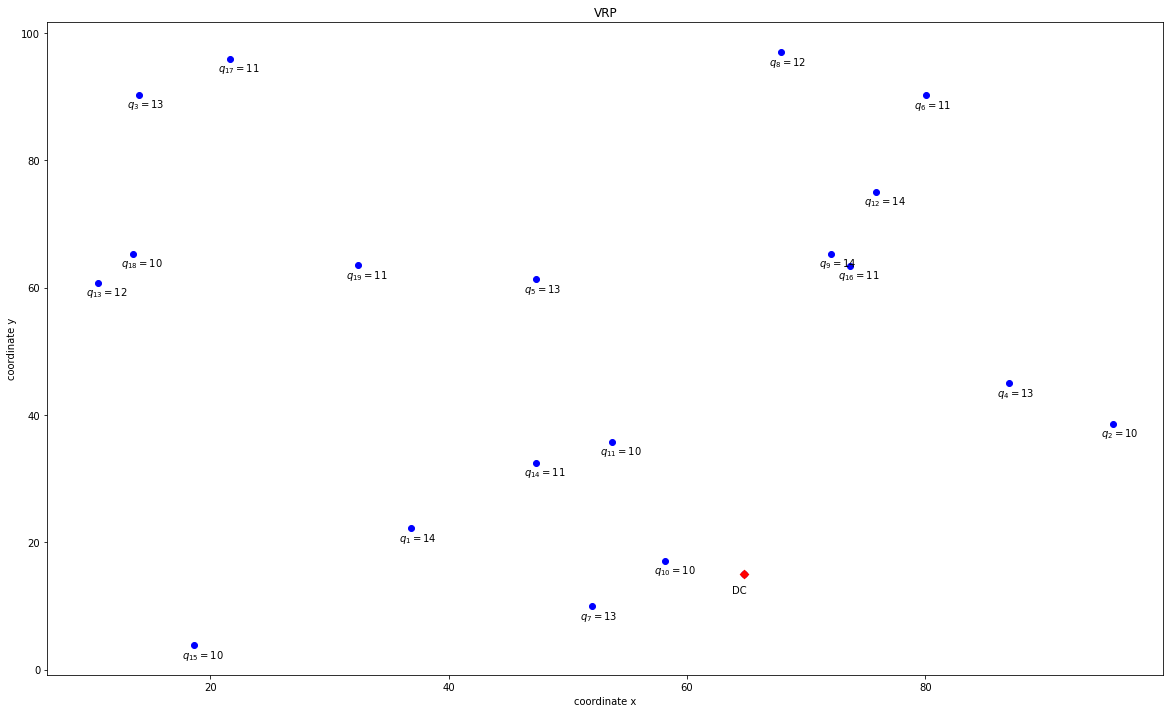

In [9]:
# print graph

plt.figure(figsize=(20,12))
plt.scatter(X,Y,color='blue')

# center
plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-3))

# clients
for i in C:
    plt.annotate('$q_{%d}=%d$' %(i,q[i]),(X[i]-1,Y[i]-2))

plt.xlabel("coordinate x")
plt.ylabel("coordinate y")
plt.title("VRP")
plt.show()

In [10]:
# config values
MAX_CPU_TIME = 300.0
EPSILON = 1e-6

In [11]:
# Formulations

# model
model = gp.Model("CVRP")

# variables
x = model.addVars(A, vtype = gp.GRB.BINARY, name = 'x')
u = model.addVars(C, vtype = gp.GRB.CONTINUOUS, name = 'u')

# objective
model.setObjective(gp.quicksum(distance[i,j] * x[i,j] for i,j in A), gp.GRB.MINIMIZE)

# constraints
model.addConstrs(gp.quicksum(x[i,j] for j in V if j!=i) == 1 for i in C)
model.addConstrs(gp.quicksum(x[i,j] for i in V if i!=j) == 1 for j in C)
model.addConstrs((x[i,j] == 1) >> (u[i]+q[j] == u[j]) for i,j in A if j!=0 and i!=0)
model.addConstrs(u[i] >= q[i] for i in C)
model.addConstrs(u[i] <= Q for i in C)

# export .lp
#model.write(file_name+"_model.lp")

# parameters 
model.setParam(gp.GRB.Param.TimeLimit, MAX_CPU_TIME)
model.setParam(gp.GRB.Param.MIPGap, EPSILON)
model.setParam(gp.GRB.Param.Threads, 1)

# turn off display
gp.setParam('OutputFlag', 0)

# open log file
#_ = open('log/cvrp.log', 'w')

# optimize model
model.optimize() 

tmp = 0
if model.status == gp.GRB.OPTIMAL:
    tmp = 1

ub = model.objBound
lb = model.objVal
gap = model.MIPGap
time = model.Runtime
nodes = model.NodeCount
status = tmp

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-15


Set parameter TimeLimit to value 300
Set parameter MIPGap to value 1e-06
Set parameter Threads to value 1


In [12]:
print("ub= ", round(ub,2))
print("lb =", round(lb,2))
print("gap = ", round(gap,2))
print("time = ", round(time,2))
print("nodes = ", round(nodes,2))
print("status = ", tmp)

ub=  536.26
lb = 727.85
gap =  0.26
time =  300.0
nodes =  288829.0
status =  0


In [13]:
# print solution
print("optimal: ", str(round(model.objVal,2)))
for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(round(v.x,2)))

optimal:  727.85
x[0,2]=1.0
x[0,10]=1.0
x[0,14]=1.0
x[0,16]=1.0
x[0,17]=1.0
x[1,15]=1.0
x[2,4]=1.0
x[3,18]=1.0
x[4,9]=1.0
x[5,11]=1.0
x[6,8]=1.0
x[7,0]=1.0
x[8,0]=1.0
x[9,0]=1.0
x[10,1]=1.0
x[11,0]=1.0
x[12,6]=1.0
x[13,0]=1.0
x[14,19]=1.0
x[15,7]=1.0
x[16,12]=1.0
x[17,3]=1.0
x[18,13]=1.0
x[19,5]=1.0
u[1]=24.0
u[2]=10.0
u[3]=24.0
u[4]=23.0
u[5]=40.0
u[6]=36.0
u[7]=47.0
u[8]=48.0
u[9]=37.0
u[10]=10.0
u[11]=50.0
u[12]=25.0
u[13]=46.0
u[14]=16.0
u[15]=34.0
u[16]=11.0
u[17]=11.0
u[18]=34.0
u[19]=27.0


In [14]:
# optimal tour
opt_router = list()
for i in C:
    if x[(0,i)].x > 0.9:
        aux = [0,i]
        while i!=0:
            j=i
            for k in V:
                if j!=k and x[(j,k)].x > 0.9:
                    aux.append(k)
                    i = k
        opt_router.append(aux)

print(opt_router)

[[0, 2, 4, 9, 0], [0, 10, 1, 15, 7, 0], [0, 14, 19, 5, 11, 0], [0, 16, 12, 6, 8, 0], [0, 17, 3, 18, 13, 0]]


In [15]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

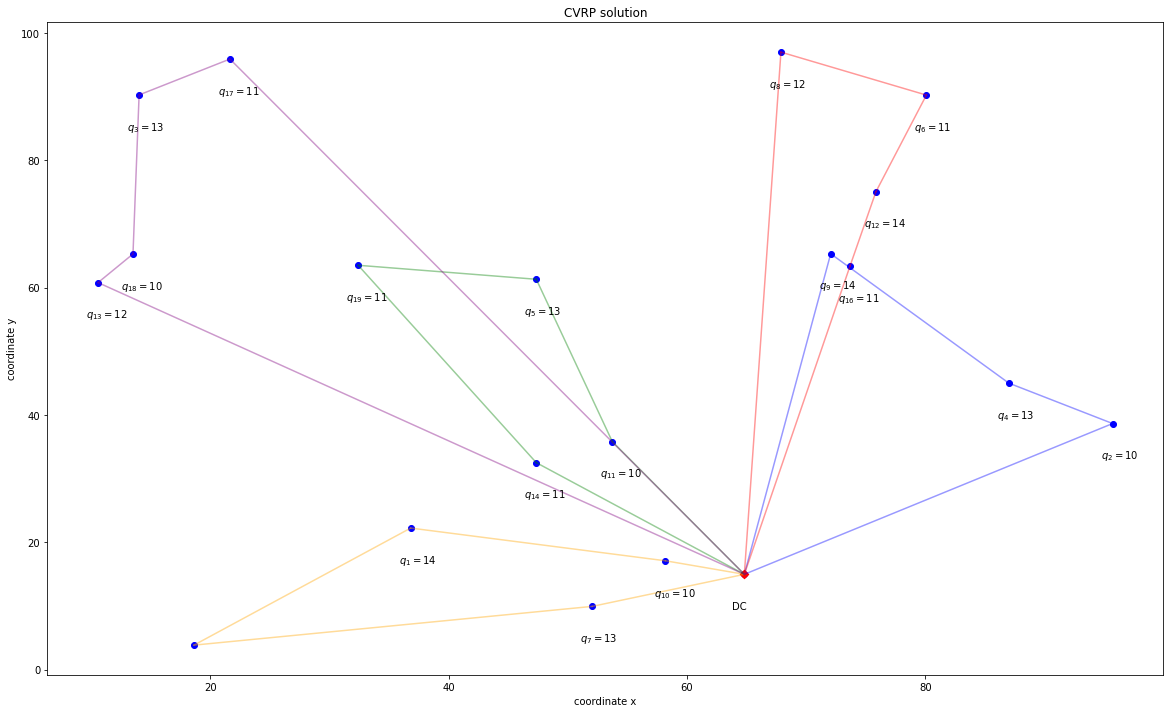

In [16]:
#print graph

plt.figure(figsize=(20,12))
plt.scatter(X,Y,color='blue')

# DC
plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

# clients
for i in C:
    plt.annotate('$q_{%d}=%d$' %(i,q[i]),(X[i]-1,Y[i]-5.5))
    
# routers
for r in range(len(opt_router)):
    for n in range(len(opt_router[r])-1):
        i = opt_router[r][n]
        j = opt_router[r][n+1]
        plt.plot([X[i],X[j]],[Y[i],Y[j]],color=Color[r], alpha=0.4)
        
plt.xlabel("coordinate x")
plt.ylabel("coordinate y")
plt.title("CVRP solution")
plt.show()

### Vehicle Routing Problem With Time Windows (VRPTW)

#### Data

* $C$: set of clients
* $V = \{0\} \cup C$: set of vertices, where 0 is the distribution center.
* $A = \{ (i,j) \in V \times V \; : \; i \not= j  \}$: set of arcs.
* $q_i$: demand of each client.
* $Q$: capacity of vehicle.
* $K = \{ 1,2, \ldots, n \}$, set of vehicles.
* $s_i$, service time for each customer $i \in C$ ($s_0 = 0$).
* $[e_i, l_i]$, time window with $0 \le e_i \le l_i$ for each location $i \in V$
* $c_{ij} $, cost service for $(i,j) \in A$.
* $T_{ij} $, time traveling for $(i,j) \in A$.

#### Variables

* $
x_{i,j,k} = 
\left\{
\begin{array}{lr}
1, \text{ if arc } (i,j) \in A \text{ is used by vehicle } k. \\
0, \text{ otherwise}
\end{array}
\right.
$

* $t_{ik}$, time at which service starts at the vertice $i \in N$ with vehicle $k \in K$

#### MIP Formulation

\begin{align}
z = \min & \sum_{k \in K} \sum_{(i,j) \in A} c_{i,j,k} x_{i,j,k} \\
& \sum_{j \in C} x_{0,j,k} \leq 1 \; \forall k \in K \\
& \sum_{i \in C} x_{i,0,k} \leq 1 \; \forall k \in K \\
& \sum_{j \in V} \sum_{k \in K} x_{i,j,k} = 1 \; \forall i \in C \\
& \sum_{j \in V} x_{i,j,k} - \sum_{j \in V} x_{j,i,k} = 0 \; \forall k \in K, \; \forall i \in C \\
& \sum_{i \in C} q_i \sum_{j \in V} x_{i,j,k} \leq Q, \forall k \in K \\
& \text{if } x_{i,j,k} = 1 \to t_{ik} + s_i + T_{i,j} = t_{j,k} \; \forall k \in K, \; \forall (i,j) \in A \\
& e_i \leq t_{i,k} \leq l_{i} \; \forall i \in V, \; \forall k \in K.
\end{align}

In [47]:
# clients, vertices, arcs
n = 10
C = [i for i in range(n) if i!=0]
V = [0] + C
A = [(i,j) for i in V for j in V if i!=j]

In [48]:
# demand
np.random.seed(0)
q = {n : np.random.randint(10,15) for n in C}
q[0] = 0

In [57]:
# sales time

# minimum arrival time
#e = {0:0, 1:10, 2:10, 3:10, 4:20, 5:20, 6:20, 7:40, 8:40, 9:40, 10:40} 
np.random.seed(0)
e = {n : np.random.randint(10,40) for n in C}
e[0] = 0

# maximum arrival time
#l = {0:200, 1:100, 2:100, 3:100, 4:150, 5:150, 6:150, 7:180, 8:180, 9:180, 10:180}
np.random.seed(0)
l = {n : np.random.randint(100,180) for n in C}
l[0] = 200

In [58]:
# service time at vertex i
s = {n: np.random.randint(3,5) for n in C}
s[0] = 0

In [59]:
# vehicles
K = [1,2,3,4]

In [60]:
# vehicles capacity
# Q = 50
Q = {1:50, 2:50, 3:25, 4:25}

In [61]:
# coordinates
X = np.random.rand(len(V))*100
Y = np.random.rand(len(V))*100

In [62]:
# distance
distance = {
    (i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in V if i!=j
}

# time service
timeserv = {
    (i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in V for j in V if i!=j
}

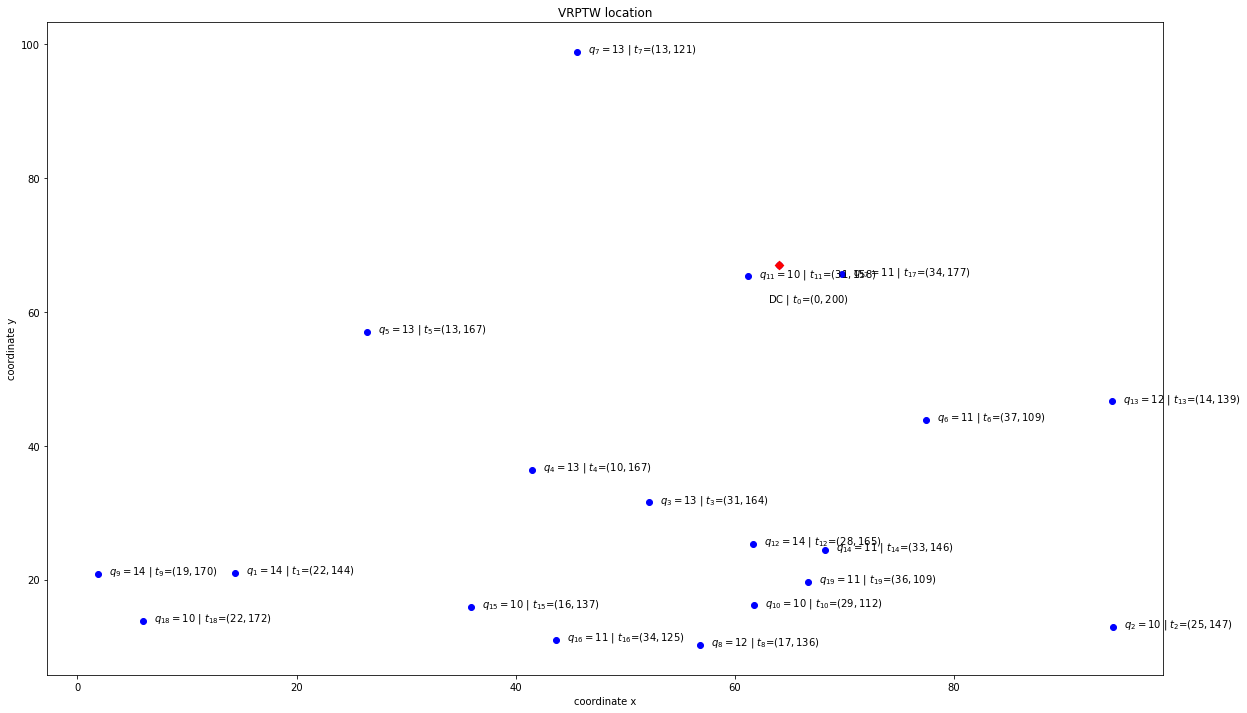

In [63]:
# graph
plt.figure(figsize=(20,12))
plt.scatter(X,Y,color='blue')

# DC: distribuition center
plt.scatter(X[0],Y[0], color='red',marker='D')
plt.annotate("DC | $t_{%d}$=(%d$,%d$)" %(0,e[0],l[0]),(X[0]-1,Y[0]-5.5))

for i in C:
    plt.annotate('$q_{%d}=%d$ | $t_{%d}$=(%d$,%d$)' %(i,q[i],i,e[i],l[i]),(X[i]+1,Y[i]))

plt.xlabel("coordinate x")
plt.ylabel("coordinate y")
plt.title("VRPTW location")

plt.show()

In [64]:
# MIP formulation

# arcs
arcos = [(i,j,k) for i in V for j in V for k in K if i!=j]

arcos_t = [(i,k) for i in V for k in K]

# model
model = gp.Model("VRPTW")

# variables
x = model.addVars(arcos, vtype=gp.GRB.BINARY, name='x')
t = model.addVars(arcos_t, vtype=gp.GRB.CONTINUOUS, name='t')

# objective
model.setObjective(gp.quicksum(distance[i,j]*x[i,j,k] for i,j,k in arcos), gp.GRB.MINIMIZE)

# constraints

# arrival and departure of vehicles from DC
model.addConstrs(gp.quicksum(x[0,j,k] for j in C) <= 1 for k in K)
model.addConstrs(gp.quicksum(x[i,0,k] for i in C) <= 1 for k in K)

# one vehicle per vertices
model.addConstrs(gp.quicksum(x[i,j,k] for j in V for k in K if i!=j) == 1 for i in C)

# flux conservation
model.addConstrs(
    gp.quicksum(x[i,j,k] for j in V if i!=j) - gp.quicksum(x[j,i,k] for j in V if i!=j) == 0
    for i in V for k in K
)

# vehicle capacity
model.addConstrs(
    gp.quicksum(q[i] * gp.quicksum(x[i,j,k] for j in V if i!=j) for i in C) <= Q[k] for k in K
)

# time window
# indicator constraint
# subtour elimination
model.addConstrs(
    (x[i,j,k]==1) >> ( t[i,k] + s[i] + timeserv[i,j] == t[j,k] ) 
    for i in C for j in C for k in K if i!=j
)

model.addConstrs(t[i,k] >= e[i] for i,k in arcos_t)
model.addConstrs(t[i,k] <= l[i] for i,k in arcos_t)

# export .lp
#model.write(file_name+"_model.lp")

# parameters 
model.setParam(gp.GRB.Param.TimeLimit, MAX_CPU_TIME)
model.setParam(gp.GRB.Param.MIPGap, EPSILON)
model.setParam(gp.GRB.Param.Threads, 1)

# turn off display
#gp.setParam('OutputFlag', 0)

# open log file
#_ = open('vrptw.log', 'w')

# optimize model
model.optimize() 

tmp = 0
if model.status == gp.GRB.OPTIMAL:
    tmp = 1

# get solution
objbound = model.objBound
objval = model.objVal
mipgap = model.MIPGap
runtime = model.Runtime
nodecount = model.NodeCount
status = tmp

Set parameter TimeLimit to value 300
Set parameter MIPGap to value 1e-06
Set parameter Threads to value 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads

Optimize a model with 271 rows, 1600 columns and 6240 nonzeros
Model fingerprint: 0x00f5c06d
Model has 1368 general constraints
Variable types: 80 continuous, 1520 integer (1520 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
  GenCon rhs range [9e+00, 1e+02]
  GenCon coe range [1e+00, 1e+00]
Presolve added 2954 rows and 494 columns
Presolve time: 0.10s
Presolved: 3225 rows, 2094 columns, 20031 nonzeros
Variable types: 694 continuous, 1400 integer (1400 binary)

Root relaxation: infeasible, 399 iterations, 0.02 seconds (0.01 work units)



AttributeError: Unable to retrieve attribute 'objVal'

In [46]:
print("ub= ", round(ub,2))
print("lb =", round(lb,2))
print("gap = ", round(gap,2))
print("time = ", round(time,2))
print("nodes = ", round(nodes,2))
print("status = ", tmp)

ub=  587.21
lb = 587.21
gap =  0.0
time =  3.48
nodes =  2574.0
status =  1


In [40]:
# print solution

print("Objective:", str(round(model.ObjVal,2)))

for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+" = "+str(round(v.x,2)))

Objective: 587.21
x[0,3,1] = 1.0
x[0,4,2] = 1.0
x[0,6,4] = 1.0
x[0,8,3] = 1.0
x[1,2,1] = 1.0
x[2,10,1] = 1.0
x[3,1,1] = 1.0
x[4,7,2] = 1.0
x[5,0,3] = 1.0
x[6,0,4] = 1.0
x[7,9,2] = 1.0
x[8,5,3] = 1.0
x[9,0,2] = 1.0
x[10,0,1] = 1.0
t[1,1] = 43.9
t[1,2] = 100.0
t[1,3] = 10.0
t[1,4] = 10.0
t[2,1] = 96.58
t[2,2] = 100.0
t[2,3] = 10.0
t[2,4] = 10.0
t[3,1] = 10.0
t[3,2] = 100.0
t[3,3] = 100.0
t[3,4] = 100.0
t[4,1] = 150.0
t[4,2] = 20.0
t[4,3] = 150.0
t[4,4] = 20.0
t[5,1] = 137.31
t[5,2] = 150.0
t[5,3] = 47.65
t[5,4] = 32.35
t[6,1] = 150.0
t[6,2] = 150.0
t[6,3] = 20.0
t[6,4] = 20.0
t[7,1] = 157.31
t[7,2] = 53.16
t[7,3] = 180.0
t[7,4] = 127.15
t[8,1] = 180.0
t[8,2] = 180.0
t[8,3] = 40.0
t[8,4] = 40.0
t[9,1] = 157.31
t[9,2] = 112.82
t[9,3] = 180.0
t[9,4] = 180.0
t[10,1] = 170.03
t[10,2] = 180.0
t[10,3] = 180.0
t[10,4] = 40.0


In [41]:
tour = list()
truck = list()
Kaux = K
Naux = V
for k in K:
    for i in V:
        if i!=0 and x[(0,i,k)].x > 0.9:
            aux = [0,i]
            while i!=0:
                j = i
                for h in V:
                    if j!=h and x[(j,h,k)].x > 0.9:
                        aux.append(h)
                        i = h
            tour.append(aux)
            truck.append(k)
print(tour)
print(truck)

[[0, 3, 1, 2, 10, 0], [0, 4, 7, 9, 0], [0, 8, 5, 0], [0, 6, 0]]
[1, 2, 3, 4]


In [42]:
# time calculation
time_acum = list()
for n in range(len(tour)):
    for k in range(len(tour[n])-1):
        if k==0:
            aux=[0]
        else:
            i=tour[n][k]
            j=tour[n][k+1]
            t = timeserv[i,j]+s[i]+aux[-1]
            aux.append(t)
    time_acum.append(aux)

In [43]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

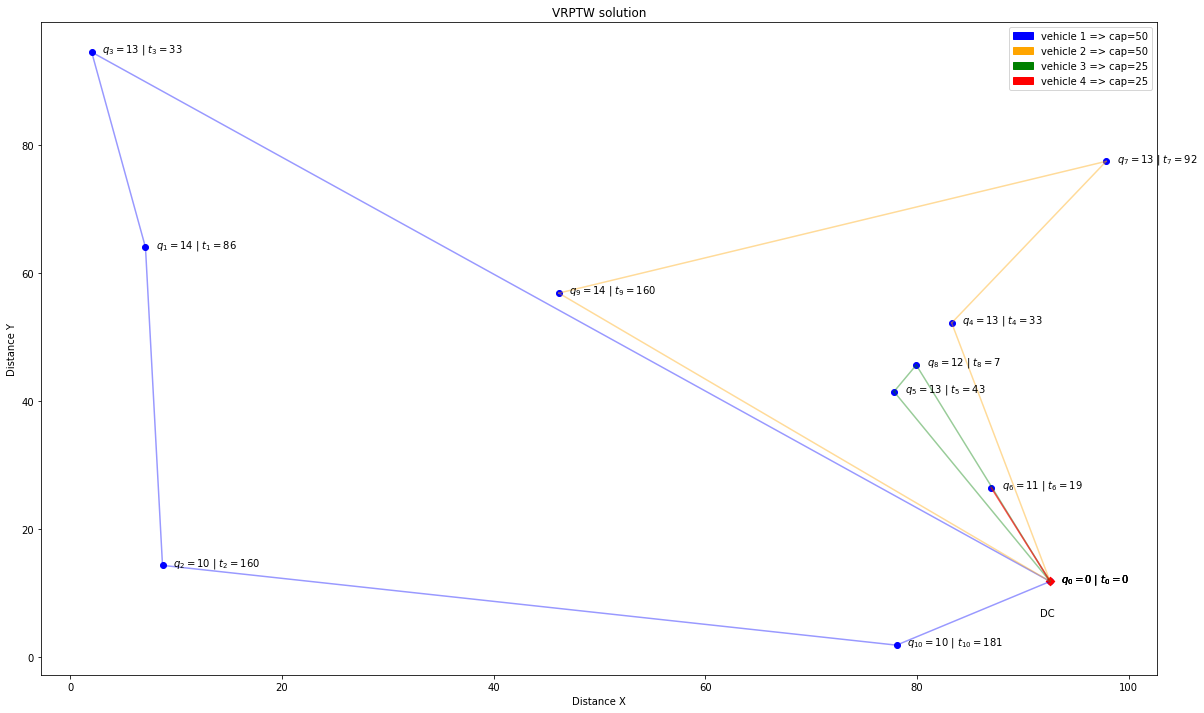

In [45]:
# print graph solution

plt.figure(figsize=(20,12))
plt.scatter(X,Y,color='blue')

# DC: distribution center
plt.scatter(X[0],Y[0], color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

# routes
for r in range(len(tour)):
    for n in range(len(tour[r])-1):
        i = tour[r][n]
        j = tour[r][n+1]
        plt.plot([X[i],X[j]],[Y[i],Y[j]],color=Color[r],alpha=0.4)

for r in range(len(time_acum)):
    for n in range(len(time_acum[r])):
        i = tour[r][n]
        plt.annotate(
            '$q_{%d}=%d$ | $t_{%d}=%d$' %(i,q[i],i,time_acum[r][n]),(X[i]+1,Y[i])
        )
        
        
patch = [
    mpatches.Patch(
        color=Color[n],label="vehicle "+str(truck[n])+" => cap="+str(Q[truck[n]])
    )
    for n in range(len(truck))
]

plt.legend(handles=patch,loc='best')
plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("VRPTW solution")
plt.show()